## Aula 5

- Exercício $f(x)=0$
- Introdução à interpolação polinomial

### Exercício

Considere a função $f(x)=\log(x)+\tan(x)$.

- a) Mostre que a equação $f(x)=0$ tem exactamente uma raiz no intervalo $]\frac{\pi}{2},\frac{3\pi}{2}[$.

- b) Utilize o método da bissecção para determinar um intervalo com $0.1$ de amplitude que contenha essa raiz.
  
- c) Mostre que o método de Newton-Raphson converge para a raiz da equação $f(x)=0$ no intervalo determinado na alínea anterior.

- d) Considerando uma aproximação inicial adequada, efectue 5 iterações do método de Newton-Raphson e determine um majorante do erro da aproximação obtida.

- e) Efectue agora 10 iterações do método da falsa posição e do método da secante para aproximar a solução de $f(x)=0$.

- f) Compare e comente os resultados obtidos.

Resolução a):
 
 - $f \in C^2(]\frac{\pi}{2},\frac{3\pi}{2}[)$
 - $\lim_{x\rightarrow\frac{\pi}{2}}f(x)=-\infty$ e $\lim_{x\rightarrow\frac{3\pi}{2}}f(x)=+\infty$
 - $f'(x)=\frac{1}{x}+\sec^2(x) > 0$   para   todos os $x\in ]\frac{\pi}{2},\frac{3\pi}{2}[$ 
 - Como consequência (Bolzano e corolários) $f$ tem um zero único no intervalo dado.
 


Resolução b):
- O intervalo inicial para o método da bissecção tem de ser adaptado (os extremos não pertencem ao domínio de $f(x)$).

In [10]:
from math import pi, tan, cos, log, sin

A=pi/2.+0.1
B=3*pi/2.-0.1

f= lambda x: log(x)+tan(x)

DMAX=0.1
DIAM = B-A

while DIAM > DMAX:
    print('A=', A, 'B=', B)
    print(DIAM)
    p=(A+B)/2.0
    if(f(A)*f(p)>0):
        A=p
    else:
        B=p
    DIAM=B-A
   
A=round(A-0.05,1)
B=round(B+0.05,1)

print('A=', A, 'B=', B)


A= 1.6707963267948966 B= 4.61238898038469
2.9415926535897934
A= 1.6707963267948966 B= 3.141592653589793
1.4707963267948965
A= 2.4061944901923447 B= 3.141592653589793
0.7353981633974485
A= 2.4061944901923447 B= 2.773893571891069
0.36769908169872423
A= 2.4061944901923447 B= 2.5900440310417068
0.18384954084936211
A= 2.4 B= 2.5


Resolução c)
 Estudemos a segunda derivada de $f(x)$

- $f''(x)=-\frac{1}{x^2}+2\sec^2(x)\tan(x)$
- $f'''(x)=\frac{2}{x^3}+2\sec^4(x)+4\sec^2(x)\tan^2(x)>0$ para todo o $x\in[2.4,2.5]$
- $f''(x)$ é estritamente crescentes

In [11]:
# C. Auxiliares
df =  lambda x : 1.0/x+cos(x)**(-2) 
print('df(2.4)=', df(2.4))
print('df(2.5)=',df(2.5))
print('\n')
ddf = lambda x : -x**(-2)+2.*cos(x)**(-3)*sin(x)
print('ddf(2.4)=', ddf(2.4))
print('ddf(2.5)=',ddf(2.5))

df(2.4)= 2.25574884555255
df(2.5)= 1.9580423125717252


ddf(2.4)= -3.542862222597472
ddf(2.5)= -2.48778469506473


- $f''(x)<0$ para todo o $x\in[2.4,2.5]$

- O Método de Newton Converge para a aproximação inicial $x_0=2.4$.

Observações extra:

- $f'(x)$ é estritamente decrescente

Resolução d) 

- $x_0=2.4$
-  $$K=\frac{1}{2}\frac{\max_{x\in[2.4,2.5]}|f''(x)|}{\min_{x\in[2.4,2.5]}|f'(x)|}$$

In [12]:
#Newton-Raphson
import numpy as np
Niter=5

K=0.5*abs(ddf(2.4))/abs(df(2.5))

print('K=',K, '\n')

X_Newt=np.zeros(Niter)
X_Newt[0]=2.4

DX_Newt=np.zeros(Niter-1)

for i in range(1,Niter):
    X_Newt[i]=X_Newt[i-1]-f(X_Newt[i-1])/df(X_Newt[i-1])
    

# Vectorização (é possível evitar alguns loops)
# Cálculo dos majorantes dos erros
DX_Newt[0:Niter-1]=np.fabs(X_Newt[1:Niter]-X_Newt[0:Niter-1])

np.set_printoptions(precision=10)

print('X_Newt=', X_Newt, '\n')
print('DX_Newt=', DX_Newt,'\n')
print('Maj_Erro=', K*DX_Newt**2,'\n')

K= 0.9046950108918275 

X_Newt= [2.4          2.4179743203 2.4182295047 2.4182295539 2.4182295539] 

DX_Newt= [1.7974320324e-02 2.5518432694e-04 4.9229758492e-08 1.7763568394e-15] 

Maj_Erro= [2.9228541822e-04 5.8912871248e-08 2.1925908925e-15 2.8547141010e-30] 



Resolução e) **PERIGO! o que se passa aqui?**

In [13]:
# Falsa Posição
X_Fp=np.zeros(Niter)
X_Fp[0]=2.4
X_Fp[1]=2.5


x0=X_Fp[0]
x1=X_Fp[1]


DX_Fp=np.zeros(Niter-1)

for i in range(2,Niter):
    x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
    f1=f(x1)
    f2=f(x2)
    if f1*f2 <0:
        x0=x1
    x1=x2
    X_Fp[i]=x2

# Vectorização (é possível evitar alguns loops)
# Cálculo dos majorantes dos erros
DX_Fp[0:Niter-1]=np.fabs(X_Fp[1:Niter]-X_Fp[0:Niter-1])

print('X_Fp=', X_Fp, '\n')
print('DX_Fp=', DX_Fp,'\n')

X_Fp= [2.4          2.5          2.4193245231 2.4182447529 2.418229765 ] 

DX_Fp= [1.0000000000e-01 8.0675476927e-02 1.0797701794e-03 1.4987937651e-05] 



In [14]:
# Secante
X_Sec=np.zeros(Niter)
X_Sec[0]=2.4
X_Sec[1]=2.5


DX_Sec=np.zeros(Niter-1)

for i in range(2,Niter):
    X_Sec[i]=X_Sec[i-1]-f(X_Sec[i-1])*(X_Sec[i-1]-X_Sec[i-2])/(f(X_Sec[i-1])-f(X_Sec[i-2]))
    

# Vectorização (é possível evitar alguns loops)
# Cálculo dos majorantes dos erros
DX_Sec[0:Niter-1]=np.fabs(X_Sec[1:Niter]-X_Sec[0:Niter-1])

print('X_Sec=', X_Sec, '\n')
print('DX_Sec=', DX_Sec,'\n')

X_Sec= [2.4          2.5          2.4193245231 2.4181644033 2.4182296078] 

DX_Sec= [1.0000000000e-01 8.0675476927e-02 1.1601198024e-03 6.5204482346e-05] 



## Interpolação Polinomial

Suponha-se  que $f$ é uma função incógnita que se conhece apenas em $x_0,\cdots,x_n$.

Pretende-se encontrar a expressão de uma função polinomial $g$ de forma que
$g(x_i)=f(x_i),\ i=0,\cdots, n.$

- Veja-se o exemplo seguinte:

In [17]:
from scipy import interpolate

x = np.array([0.0,1.0,2.0,3.0])
y = np.sin(x)

data=np.array([x,y])
print(data)


[[0.           1.           2.           3.          ]
 [0.           0.8414709848 0.9092974268 0.1411200081]]


- Qual o polinómio de (menor grau possível) que se coloca sobre os pontos da tabela?

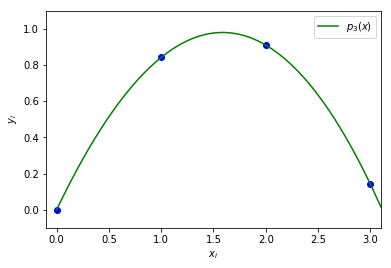

In [23]:
import matplotlib.pyplot as plt
f = interpolate.lagrange(x, y)

xnew = np.linspace(0,3.1, 500)
ynew = f(xnew)   # interpolacao de lagrange no modulo `interpolate.lagrange`

plt.plot(x, y, 'o',color='b')
plt.plot(xnew, ynew, '-',color='g', label='$p_3(x)$')
plt.xlim(-0.1,3.1)
plt.ylim(-0.1,1.1)
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend(loc='best')
plt.show()

### Teorema 

- Existe  um e um só polinómio de grau $\leq n$,  $g(x)=a_0+a_1x+\cdots +a_n x_n^n$, tal que $g(x_k)=f(x_k),\ k=0,\cdots, n$ com $x_j\neq x_k,\,\forall j\neq k.$

### Questão :

- Como construir esse polinómio para uma dada tabela de valores $[x,y]$?

### Resposta:

- Método dos Coeficientes indeterminados
- Polínomios interpoladores de Lagrange, Diferenças Divididas de Newton...

**Exercício**: Usando o MCI, determine o polinómio interpolador de menor grau que se
coloca sobre os pontos da tabela $x=[0,2,4]$, $y=f(x)=[0,3,-1]$  e determine uma aproximação de $f(3.2)$
e de $f(4.7)$.

Resolução pelo Método dos Coeficientes indeterminados:
 
 - Resolução do sistema seguinte: 

 \begin{equation}\label{eq:MCI}
    \left[
      \begin{array}{cccc}
        1&x_0&\cdots&x_0^n\\
        1&x_1&\cdots&x_1^n\\
        \vdots&\vdots&\vdots&\vdots\\
        1&x_n&\cdots&x_n^n\\
      \end{array}
    \right]
    \left[
      \begin{array}{c}
        a_0\\
        a_1\\
        \vdots\\
        a_n
      \end{array}
    \right]=
    \left[
      \begin{array}{c}
        f(x_0)\\
        f(x_1)\\
        \vdots\\
        f(x_n)
      \end{array}
    \right]
  \end{equation}

[[ 1  0  0]
 [ 1  2  4]
 [ 1  4 16]]
[ 0  3 -1]
Os coefs. a0, a1 e a2 sao 0.000 , 3.250 e -0.875
f(3.2)=1.440
f(4.7)=-4.054


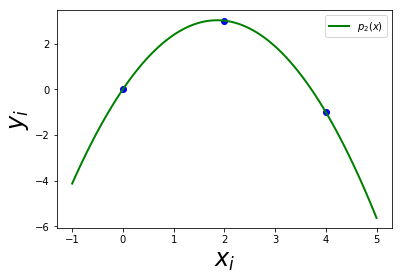

In [24]:
# Valores tabelados
x = np.array([0,2,4])
y = np.array([0,3,-1])

#Construção do sistema normal
#Matriz A (Por Linhas)
L1=[1,x[0],x[0]**2]
L2=[1,x[1],x[1]**2]
L3=[1,x[2],x[2]**2]

A=np.array([L1,L2,L3])
print(A)

b=y
print(b)
X_a=np.linalg.solve(A,b)
print(r"Os coefs. a0, a1 e a2 sao %.3f , %.3f e %.3f"\
  % (X_a[0],X_a[1],X_a[2]))

def f(xis):
 return X_a[0]+X_a[1]*xis+X_a[2]*np.square(xis)

print(r"f(3.2)=%.3f" % (f(3.2)))

print(r"f(4.7)=%.3f" % (f(4.7)))

# Apresentação dos gráficos
plt.rc('axes', labelsize=24)
plt.plot(x, y, 'o', color='b')

xx=np.linspace(-1,5,100)


plt.plot(xx, f(xx) ,'-',color='g', lw=2,label='$p_2(x)$')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.legend(loc='best')
plt.show()

### Questão: Porque não utilizar este método?

- Polinómios de Lagrange



- 2 pontos de interpolação $(a,f(a)),\ (b,f(b))$: polinómio de grau 1.
$$P(x)=f(a)\frac{x-b}{a-b} +f(b)\frac{x-a}{b-a}$$




- 3 pontos de interpolação $(a,f(a)),\ (b,f(b)),\ (c,f(c))$: polinómio de grau 2.
$$P(x)=f(a)\frac{(x-b)(x-c)}{(a-b)(a-c)} +f(b)\frac{(x-a)(x-c)}{(b-a)(b-c)}+f(c)\frac{(x-a)(x-b)}{(c-a)(c-b)}$$



- $n+1$ pontos de interpolação $(x_i,f(x_i))\, (i=0,\dots, n)$
$$\displaystyle P_n(x)=\sum_{i=0}^{n}f(x_i)L_i(x)=\sum_{i=0}^{n}f(x_i)\prod_{\stackrel{j=0}{
    j\neq i}}^n\frac{(x-x_j)}{(x_i-x_j)}$$
onde $$L_i(x)=\prod_{\stackrel{j=0}{
    j\neq i}}^n\frac{(x-x_j)}{(x_i-x_j)}$$ são designados por  polinómios de Lagrange


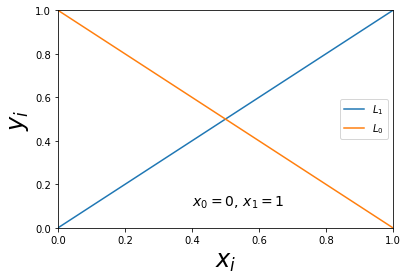

In [9]:
x = np.array([0.0,1.0])
y = np.array([0.0,1,0])
y2 = np.array([1.0,0,0])
L1 = interpolate.lagrange(x, y)
L2 = interpolate.lagrange(x, y2)

xnew = np.arange(0.0,1.1, 0.1)
ynew = L1(xnew)
ynew2 = L2(xnew)


plt.rc('axes', labelsize=24)
plt.text(0.4,0.1,'$x_0=0,\, x_1=1$', fontsize=14)
plt.plot(xnew, ynew,  '-', lw=1.5, label='$L_1$')
plt.plot(xnew, ynew2,'-', lw=1.5, label='$L_0$')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.legend(loc='best')
plt.show()


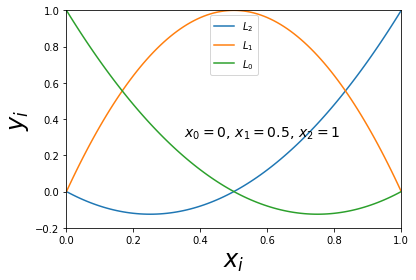

In [10]:
x = np.array([0.0,0.5,1.0])
y = np.array([0.0,0.0,1.0])
y2 = np.array([0.0,1.0,0.0])
y3 = np.array([1.0,0.0,0.0])
L1 = interpolate.lagrange(x, y)
L2 = interpolate.lagrange(x, y2)
L3 = interpolate.lagrange(x, y3)

xnew = np.arange(0.0,1.01, 0.01)
ynew = L1(xnew)
ynew2 = L2(xnew)
ynew3 = L3(xnew)

plt.rc('axes', labelsize=24)
plt.text(0.35,0.3,'$x_0=0,\, x_1=0.5,\, x_2=1$', fontsize=14)
plt.plot(xnew, ynew, '-', lw=1.5, label='$L_2$')
plt.plot(xnew, ynew2,'-', lw=1.5, label='$L_1$')
plt.plot(xnew, ynew3,'-', lw=1.5, label='$L_0$')
plt.xlim(0.0,1.0)
plt.ylim(-0.2,1.0)
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend(loc='best')
plt.show()

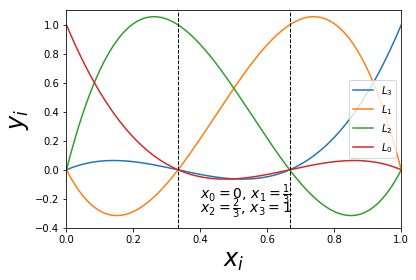

In [11]:
x = np.array([0.0,1.0/3.0,2.0/3.0,1.0])
y = np.array([0.0,0.0,0.0,1.0])
y2 = np.array([0.0,0.0,1.0,0.0])
y3 = np.array([0.0,1.0,0.0,0.0])
y4 = np.array([1.0,0.0,0.0,0.0])
L1 = interpolate.lagrange(x, y)
L2 = interpolate.lagrange(x, y2)
L3 = interpolate.lagrange(x, y3)
L4 = interpolate.lagrange(x, y4)

xnew = np.arange(0.0,1.001, 0.001)
ynew = L1(xnew)
ynew2 = L2(xnew)
ynew3 = L3(xnew)
ynew4 = L4(xnew)

plt.rc('axes', labelsize=24)
plt.text(0.4,-0.2,'$x_0=0,\, x_1=\\frac{1}{3}$', fontsize=14)
plt.text(0.4,-0.3,'$x_2=\\frac{2}{3},\, x_3=1$', fontsize=14)
plt.plot(xnew, ynew, '-', lw=1.5, label='$L_3$')
plt.plot(xnew, ynew2,'-', lw=1.5, label='$L_1$')
plt.plot(xnew, ynew3,'-', lw=1.5, label='$L_2$')
plt.plot(xnew, ynew4,'-', lw=1.5, label='$L_0$')
plt.axvline(x=1.0/3.0, ymin=-0.4, ymax=1.0, linestyle='--', linewidth=1,
color='k')
plt.axvline(x=2.0/3.0, ymin=-0.4, ymax=1.0, linestyle='--', linewidth=1,
color='k')

plt.xlim(0.0,1.0)
plt.ylim(-0.4,1.1)
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend(loc='best')
plt.show()

## Uma possível  implementação (sem classes/objectos...) dos polinómios de Lagrange:

In [28]:
def PLagrange(data_x,data_y):
    if (len(data_x)==len(data_y)): # testa a dimensão dos dados
        print('data=\n',np.array([data_x,data_y]))
        M=len(data_x) #  M-1 = grau do polinómio interpolador
        
        # Uma função pode devolver outra função!
        def LagrangeFunction(x):
            PolLagrange=0.0
            for i in range(0,M):
                Li=1.0
                for j in range(0,M):
                    if j==i:
                        continue
                    Li*=(x-data_x[j])/(data_x[i]-data_x[j]) #Funçoes Base
                PolLagrange+=Li*data_y[i] # Polinómio de Lagrange 
        
            return PolLagrange
        
        return LagrangeFunction





### Exercício:

- Considere a tabela de pontos 
 $$
 \begin{array}{|c|c|c|c|c|}
 \hline
x & 0& 2 & 4 &5\\
\hline
y & 0 & 3 & -1 &3\\
\hline
\end{array}
$$

- Apresente graficamente o polinómio interpolador de grau $\leq 3$ que se coloca sobre os pontos da tabela.

In [29]:
x = np.array([0,2,4,5])
y = np.array([0,3,-1,3])

#PLagrange é uma função
Lagrange=PLagrange(x,y)
points=np.array([3.2,4.7])
print(Lagrange(points))



data=
 [[ 0  2  4  5]
 [ 0  3 -1  3]]
[-0.3264    1.053975]


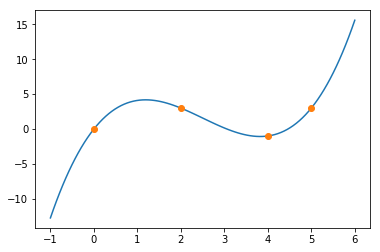

In [30]:
xx=np.linspace(-1,6,100)
yy=Lagrange(xx)
plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
plt.show()